In [1]:
from mesh_to_sdf import mesh_to_voxels, mesh_to_sdf
import open3d as o3d
import trimesh
import skimage
import numpy as np
from sklearn.metrics import mean_squared_error


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [10]:
mesh_gt = trimesh.load('/home/dendenmushi/ros1_ws/src/DSP-SLAM/good_maps/lab_cars/9_good/objects/garage_car_slam_centered_scaled.ply')
# mesh_gt = o3d.io.read_triangle_mesh('/home/dendenmushi/ros1_ws/src/DSP-SLAM/good_maps/lab_cars/9_good/objects/garage_car_gt_closed_centered.ply')

# voxels_gt = mesh_to_voxels(mesh_gt, 64, pad=True)

# vertices, faces, normals, _ = skimage.measure.marching_cubes(voxels, level=0)
# mesh = trimesh.Trimesh(vertices=vertices, faces=faces, vertex_normals=normals)
# mesh.show()


pcd_slam = o3d.io.read_point_cloud("/home/dendenmushi/ros1_ws/src/DSP-SLAM/good_maps/lab_cars/9_good/objects/garage_car_slam_centered_scaled.ply")
points_slam = np.asarray(pcd_slam.points)


# pcd1 = o3d.io.read_point_cloud("/home/vlad/Lab_related_stuff/car_gt1.ply")
# x1 = np.asarray(pcd1.points)



In [11]:
sdf = mesh_to_sdf(mesh_gt, points_slam, surface_point_method='scan', sign_method='normal', bounding_radius=None, scan_count=100, scan_resolution=400, sample_point_count=10000000, normal_sample_count=11)
print(sdf.shape)

(8510,)


In [16]:
print(sdf.mean())

-0.04151849


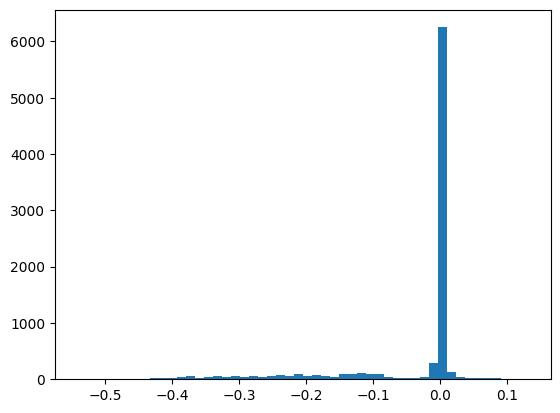

In [18]:
import matplotlib.pyplot as plt

plt.hist(sdf, bins=50)
plt.show()

In [8]:
print("sdf array:",sdf)
print("mean sdf",np.mean(sdf))

# print(np.max(x[:,0]), "X")
# print(np.min(x[:,0]), "X")
# print(np.max(x[:,1]))
# print(np.min(x[:,1]))

measured_x = np.max(x[:,0])-np.min(x[:,0])
measured_y = np.max(x[:,1])-np.min(x[:,1])
measured_z = np.max(x[:,2])-np.min(x[:,2])

print("dX=",measured_x, "dY=", measured_y, "dZ=", measured_z)

a = np.zeros_like(sdf)
mse = mean_squared_error(sdf,a)



#Ground truth sizes (Lidar scan)
truth_x = 1.8494912385940552 #width
truth_y = 1.466355562210083 #hight
truth_z = 4.1528595089912415 #lenght

#Scaling model relative to Ground truth sizes
scaleX = truth_x/measured_x
scaleY = truth_y/measured_y
scaleZ = truth_z/measured_z


print("Scale X =", scaleX, "Scale Y =", scaleY, "Scale Z =", scaleZ )

scaled_sdf = sdf * scaleX
print(np.mean(scaled_sdf), "mean scaled sdf")
print(np.max(sdf))


scaled_mse = mean_squared_error(scaled_sdf,a)
print("Mean Squared Error of sdf:", mse)

print("Scaled Mean Squared Error of sdf", scaled_mse)
print(np.max(scaled_sdf))
o3d.visualization.draw_geometries([pcd, pcd1])



sdf array: [0.48976648 0.48984307 0.5007044  ... 0.48973587 0.5210539  0.48924562]
mean sdf 0.22916378


NameError: name 'x' is not defined

In [ ]:
pcd = o3d.io.read_point_cloud("/home/vlad/Lab_related_stuff/1.ply")
pcd1 = o3d.io.read_point_cloud("/home/vlad/Lab_related_stuff/0.ply")

# points = np.asarray(pcd.points)
# points[:,2] += 1
# pcd1.points = o3d.utility.Vector3dVector(points)
o3d.visualization.draw_geometries([pcd, pcd1])

